<a href="https://colab.research.google.com/github/mariatozi/codigos-estudos/blob/main/Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [17]:
df = pd.read_excel('Dados-novo1.xlsx')

In [18]:
df.head()

,Unnamed: 0,Mês,Colaborador,Colaborador-nome-ajustado,Equipe,Descrição,Desc-dados
0,0,agosto,Amanda dos Santos Moral de Souza,Amanda dos Santos Moral de Souza,Carmem Lapa - Plantao Noturno,Queda de ligação,Queda de ligação
1,1,agosto,Amanda dos Santos Moral de Souza,Amanda dos Santos Moral de Souza,Carmem Lapa - Plantao Noturno,Queda de ligação,Queda de ligação
2,2,agosto,Amanda dos Santos Moral de Souza,Amanda dos Santos Moral de Souza,Carmem Lapa - Plantao Noturno,Queda de ligação,Queda de ligação
3,3,agosto,Amanda dos Santos Moral de Souza,Amanda dos Santos Moral de Souza,Carmem Lapa - Plantao Noturno,Queda de ligação,Queda de ligação
4,4,agosto,Amanda dos Santos Moral de Souza,Amanda dos Santos Moral de Souza,Carmem Lapa - Plantao Noturno,Queda de ligação,Queda de ligação


In [19]:
# Lista de registros alvo que você deseja contabilizar
registros_alvo = ['Abandono realizado pelo cliente', 'Fluxo pesquisa de satisfação',
                  'Ligação sem retorno de voz', 'Ligações mudas', 'Queda de ligação',
                  'Fluxo sistemas e telefonia', 'Falhas StartPhone',
                  'Problema físico aparelho ou headset',
                  'Ligações com problemas ao entrar na URA', 'Falha na tabulação da chamada',
                  'Queda de energia ou internet', 'Dados incompletos ou indevidos',
                  'Sem dados preenchidos']

# Contabilizar a frequência dos registros alvo na coluna desejada
contagem = df['Desc-dados'].value_counts()

print("Contagem de registros alvo:")
print(contagem)
contagem.to_csv('contagem2.csv')

Contagem de registros alvo:
Queda de ligação                           1770
Ligação sem retorno de voz                  396
Ligações com problemas ao entrar na URA     348
Fluxo pesquisa de satisfação                167
Falhas StartPhone                            97
Ligações mudas                               54
Queda de energia ou internet                 42
Fluxo sistemas e telefonia                   19
Problema físico aparelho ou headset          15
Sem dados preenchidos                         7
Abandono realizado pelo cliente               5
Falha na tabulação da chamada                 4
Dados incompletos ou indevidos                1
Name: Desc-dados, dtype: int64


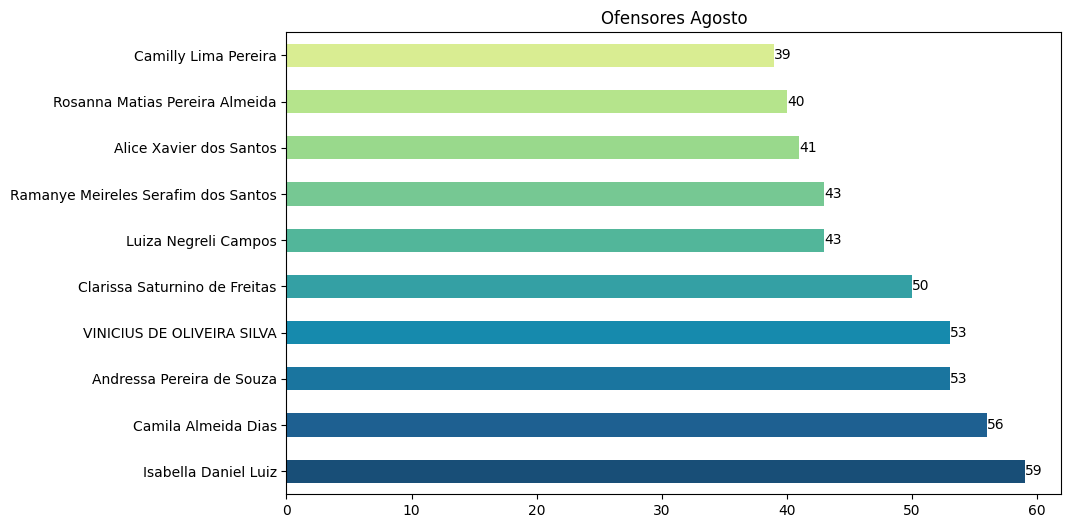

In [20]:
# Selecionar a coluna com informações ofensivas
coluna_ofensiva = 'Colaborador-nome-ajustado'
df_ofensas = df[coluna_ofensiva]


# Contar a frequência das informações ofensivas
contagem_ofensas = df_ofensas.value_counts().head(10)

# Definir cores personalizadas para as barras
cores_personalizadas = ['#184e77', '#1e6091', '#1a759f', '#168aad', '#34a0a4', '#52b69a',
                        '#76c893', '#99d98c', '#b5e48c', '#d9ed92'][::-1] # invertendo as info

# Criar um gráfico de barras horizontais para os 5 registros mais ofensores
plt.figure(figsize=(10, 6))
ax = contagem_ofensas.sort_values().plot(kind='barh', color=cores_personalizadas)
plt.title('Ofensores Agosto')

# Adicionar rótulos de dados nas barras do gráfico
ax.bar_label(ax.containers[0])

plt.gca().invert_yaxis()  # Inverter o eixo y para ter o maior valor no topo
plt.show()

In [21]:
# Contagem de registros por colaborador
contagem_colaborador = df['Colaborador-nome-ajustado'].value_counts()

# Iterar pelos colaboradores e mostrar a contagem e o nome da equipe
for colaborador, contagem in contagem_colaborador.items():
    equipe = df[df['Colaborador-nome-ajustado'] == colaborador]['Equipe'].iloc[0]
    print(f"Colaborador-nome-ajustado: {colaborador}, Equipe: {equipe}, Contagem: {contagem}")

    contagem_colaborador.to_excel('resultado.xlsx', index=False)

Colaborador-nome-ajustado: Isabella Daniel Luiz, Equipe: Wadislene Silva - HDI/Sompo/Mitsui, Contagem: 59
Colaborador-nome-ajustado: Camila Almeida Dias, Equipe: Ester Lima - Posicionamento A (HB), Contagem: 56
Colaborador-nome-ajustado: VINICIUS DE OLIVEIRA SILVA, Equipe: Natalia Lima- SAS/ Allianz, Contagem: 53
Colaborador-nome-ajustado: Andressa Pereira de Souza, Equipe: Wadislene Silva - HDI/Sompo/Mitsui, Contagem: 53
Colaborador-nome-ajustado: Clarissa Saturnino de Freitas, Equipe: Wadislene Silva - HDI/Sompo/Mitsui, Contagem: 50
Colaborador-nome-ajustado: Ramanye Meireles Serafim dos Santos, Equipe: Wadislene Silva - HDI/Sompo/Mitsui, Contagem: 43
Colaborador-nome-ajustado: Luiza Negreli Campos, Equipe: Ana Marco - Banestes/ Sancor, Contagem: 43
Colaborador-nome-ajustado: Alice Xavier dos Santos, Equipe: Ester Lima - Posicionamento A (HB), Contagem: 41
Colaborador-nome-ajustado: Rosanna Matias Pereira Almeida, Equipe: Wadislene Silva - HDI/Sompo/Mitsui, Contagem: 40
Colaborador-n

In [22]:
# Contagem de registros por colaborador
contagem_colaborador = df['Colaborador-nome-ajustado'].value_counts()

# Criar um DataFrame com os dados organizados
dados_organizados = pd.DataFrame({
    'Colaborador': contagem_colaborador.index,
    'Equipe': [df[df['Colaborador-nome-ajustado'] == col]['Equipe'].iloc[0] for col in contagem_colaborador.index],
    'Contagem': contagem_colaborador.values
})

# Ordenar o DataFrame pela contagem em ordem decrescente
dados_organizados = dados_organizados.sort_values(by='Contagem', ascending=False)

# Definir quantos dos principais ofensores você deseja mostrar
top_n = 10

# Mostrar apenas os principais ofensores
top_ofensores = dados_organizados.head(top_n)

print(top_ofensores)

                           Colaborador                              Equipe  \
0                 Isabella Daniel Luiz  Wadislene Silva - HDI/Sompo/Mitsui   
1                  Camila Almeida Dias  Ester Lima - Posicionamento A (HB)   
2           VINICIUS DE OLIVEIRA SILVA          Natalia Lima- SAS/ Allianz   
3            Andressa Pereira de Souza  Wadislene Silva - HDI/Sompo/Mitsui   
4        Clarissa Saturnino de Freitas  Wadislene Silva - HDI/Sompo/Mitsui   
5  Ramanye Meireles Serafim dos Santos  Wadislene Silva - HDI/Sompo/Mitsui   
6                 Luiza Negreli Campos        Ana Marco - Banestes/ Sancor   
7              Alice Xavier dos Santos  Ester Lima - Posicionamento A (HB)   
8       Rosanna Matias Pereira Almeida  Wadislene Silva - HDI/Sompo/Mitsui   
9                 Camilly Lima Pereira        Ana Marco - Banestes/ Sancor   

   Contagem  
0        59  
1        56  
2        53  
3        53  
4        50  
5        43  
6        43  
7        41  
8        40  
9

In [23]:
# Filtrar os registros com liderança igual a 'determinado_lider'
filtro = df['Equipe'] == 'Ester Lima - Posicionamento A (HB)'
registros_determinado_lider = df[filtro]

# Obter a quantidade de registros na coluna 'colaboradores'
quantidade_registros = registros_determinado_lider['Colaborador-nome-ajustado'].count()

print(f"A quantidade de registros para Ester Lima é: {quantidade_registros}")

A quantidade de registros para Ester Lima é: 369


In [24]:
# queda de internet
filtro_erro = df['Descrição'] == 'Queda na internet'
filtro_lideranca = df['Equipe'] == 'Ester Lima - Posicionamento A (HB)'
registros_filtrados = df[filtro_erro & filtro_lideranca]

# Criar uma contagem de registros por colaborador
contagem_por_colaborador = registros_filtrados['Colaborador-nome-ajustado'].value_counts()

print("Registros por falha de internet:")
print(contagem_por_colaborador)

Registros por falha de internet:
Alice Xavier dos Santos                     1
Amanda Moreira Belo                         1
Camila Almeida Dias                         1
Lorrayne Mendonca Goncalves                 1
Luana Cristina Goncalves de B dos Santos    1
Thamiris Passos Silva                       1
Name: Colaborador-nome-ajustado, dtype: int64


In [25]:
# Queda de internet
filtro_erro = df['Descrição'] == 'Queda de internet'
filtro_lideranca = df['Equipe'] == 'Ester Lima - Posicionamento A (HB)'
registros_filtrados = df[filtro_erro & filtro_lideranca]

contagem_por_colaborador = registros_filtrados['Colaborador-nome-ajustado'].value_counts()

print("Registros por falha de intenret:")
print(contagem_por_colaborador)

Registros por falha de intenret:
Camila Almeida Dias                         5
Luana Cristina Goncalves de B dos Santos    4
Nayelly Ramos Serafim                       4
Thamiris Passos Silva                       3
Bruna Rufino de Castro Teixeira             2
Alice Xavier dos Santos                     1
Amanda Moreira Belo                         1
Name: Colaborador-nome-ajustado, dtype: int64


In [26]:
# Queda de internet
filtro_erro = df['Descrição'] == 'Queda de energia'
filtro_lideranca = df['Equipe'] == 'Ester Lima - Posicionamento A (HB)'
registros_filtrados = df[filtro_erro & filtro_lideranca]

contagem_por_colaborador = registros_filtrados['Colaborador-nome-ajustado'].value_counts()

print("Registros por Queda de energia:")
print(contagem_por_colaborador)

Registros por Queda de energia:
Luiza Helena dos Santos Falcao        5
Julia Alves dos Santos                4
Alice Xavier dos Santos               2
Amanda Moreira Belo                   1
Isabelly da Silva Cristo              1
Karen Da Silva Guidini de Oliveira    1
Name: Colaborador-nome-ajustado, dtype: int64


In [28]:
import pandas as pd

# Substitua 'seuarquivo.xlsx' pelo nome do seu arquivo Excel
df = pd.read_excel('Dados-novo1.xlsx')

# Suponhamos que a coluna 'Falha' contenha as falhas e a coluna 'Nome' contenha os nomes

# Defina a falha que você deseja pesquisar
falha_procurada = 'Problema físico aparelho ou headset'
# Substitua pelo nome da falha que você está procurando

# Use uma consulta para encontrar os nomes associados à falha específica
nomes_relacionados = df[df['Desc-dados'] == falha_procurada]['Colaborador-nome-ajustado'].tolist()

if nomes_relacionados:
    print(f'Pessoas relacionadas à falha "{falha_procurada}":')
    for nome in nomes_relacionados:
        print(nome)
else:
    print(f'Nenhuma pessoa encontrada para a falha "{falha_procurada}"')


Pessoas relacionadas à falha "Problema físico aparelho ou headset":
Bruna Rufino de Castro Teixeira
Camila Almeida Dias
Camilly Lima Pereira
CLARA OLIVEIRA DA SILVA
CLARA OLIVEIRA DA SILVA
CLARA OLIVEIRA DA SILVA
CLARA OLIVEIRA DA SILVA
Herika Chamon
Isabella Daniel Luiz
Isabelly da Silva Cristo
Kamila Antonacio da Paixao
Kamila Antonacio da Paixao
Karen Da Silva Guidini de Oliveira
thayna correa mata
Vivian Geovana Nascimento Soprani


In [30]:
# Defina a falha que você deseja pesquisar
falha_procurada = 'Fluxo sistemas e telefonia'
# Substitua pelo nome da falha que você está procurando

# Use uma consulta para encontrar os nomes associados à falha específica
nomes_relacionados = df[df['Desc-dados'] == falha_procurada]['Colaborador-nome-ajustado'].tolist()

if nomes_relacionados:
    print(f'Pessoas relacionadas à falha "{falha_procurada}":')
    for nome in nomes_relacionados:
        print(nome)
else:
    print(f'Nenhuma pessoa encontrada para a falha "{falha_procurada}"')

Pessoas relacionadas à falha "Fluxo sistemas e telefonia":
Alice Xavier dos Santos
Alice Xavier dos Santos
Camila Almeida Dias
Camila Almeida Dias
Camila Almeida Dias
Isabelly da Silva Cristo
Julia Alves dos Santos
Julia Alves dos Santos
Kamila Antonacio da Paixao
Karen Da Silva Guidini de Oliveira
Karen Da Silva Guidini de Oliveira
Lorrayne Mendonca Goncalves
Luana Cristina Goncalves de B dos Santos
Luana Cristina Goncalves de B dos Santos
Lucas Rufino Vieira
Luiza Helena dos Santos Falcao
Luiza Helena dos Santos Falcao
Luiza Helena dos Santos Falcao
Luiza Helena dos Santos Falcao


In [31]:
# Defina a falha que você deseja pesquisar
falha_procurada = 'Fluxo pesquisa de satisfação'
# Substitua pelo nome da falha que você está procurando

# Use uma consulta para encontrar os nomes associados à falha específica
nomes_relacionados = df[df['Desc-dados'] == falha_procurada]['Colaborador-nome-ajustado'].tolist()

if nomes_relacionados:
    print(f'Pessoas relacionadas à falha "{falha_procurada}":')
    for nome in nomes_relacionados:
        print(nome)
else:
    print(f'Nenhuma pessoa encontrada para a falha "{falha_procurada}"')

Pessoas relacionadas à falha "Fluxo pesquisa de satisfação":
Christine Valentine Falcao de Lima
Laisa Izis Valcher Sant Ana
Laisa Izis Valcher Sant Ana
Alice Xavier dos Santos
Aline Dias Alcanjo
Ana Vitoria De Oliveira Ribeiro
Andressa De Souza Tatagiba
Andressa Pereira de Souza
Andressa Pereira de Souza
Andressa Pereira de Souza
Andressa Pereira de Souza
Andressa Pereira de Souza
Andressa Pereira de Souza
Andressa Pereira de Souza
Andressa Pereira de Souza
Andressa Pereira de Souza
Andressa Pereira de Souza
Andressa Pereira de Souza
Andressa Pereira de Souza
Andressa Pereira de Souza
Andressa Pereira de Souza
Andressa Pereira de Souza
Andressa Pereira de Souza
Andressa Pereira de Souza
Atila Lopes de Souza
Barbara Rodrigues Franco Leal
Barbara Rodrigues Franco Leal
Bruna Pastor Ferreira
Bruna Pastor Ferreira
Camila Almeida Dias
Camila Almeida Dias
Camila Almeida Dias
Camila Almeida Dias
Camila Almeida Dias
Carmem Francisco Dos Santos
CLARA OLIVEIRA DA SILVA
CLARA OLIVEIRA DA SILVA
CLA